In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk.corpus
import pandas as pd
from mask_keywords import keywords

In [2]:
df = pd.read_pickle("../data/dailies/full_tweets_clean.pkl")

In [3]:
df.head()

,date,id,text
0,2020-04-03,1245924111659892736,"[coronavirus, pandemic, face, mask, enough, pr..."
1,2020-04-03,1245924145059291136,"[stay, protect, north, carolina, mask, covid19..."
2,2020-04-03,1245924149450534912,"[american, wear, face, mask, protect, coronavi..."
3,2020-04-03,1245924160481591296,"[fbi, charge, man, allegedly, try, sell, mask,..."
4,2020-04-03,1245924163312857088,"[american, urge, wear, mask, outside, coronavi..."


In [4]:
df['text']= df['text'].str.join(" ")
df.head()

,date,id,text
0,2020-04-03,1245924111659892736,coronavirus pandemic face mask enough protect ...
1,2020-04-03,1245924145059291136,stay protect north carolina mask covid19 mask ...
2,2020-04-03,1245924149450534912,american wear face mask protect coronavirus sc...
3,2020-04-03,1245924160481591296,fbi charge man allegedly try sell mask per cen...
4,2020-04-03,1245924163312857088,american urge wear mask outside coronavirus pa...


In [5]:
# might need to update this
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['covid19', 'coronavirus', 'covid', 'wear', 'mask'])

In [6]:
documents = df['text'].values.astype('U') # get array of tweets
vectorizer = TfidfVectorizer(stop_words = stopwords)
features = vectorizer.fit_transform(documents)

In [7]:
k = 5
model = KMeans(n_clusters = k, init = 'k-means++', max_iter = 100, n_init = 1)
model.fit(features)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [8]:
df['cluster'] = model.labels_
df.head()

,date,id,text,cluster
0,2020-04-03,1245924111659892736,coronavirus pandemic face mask enough protect ...,1
1,2020-04-03,1245924145059291136,stay protect north carolina mask covid19 mask ...,1
2,2020-04-03,1245924149450534912,american wear face mask protect coronavirus sc...,3
3,2020-04-03,1245924160481591296,fbi charge man allegedly try sell mask per cen...,1
4,2020-04-03,1245924163312857088,american urge wear mask outside coronavirus pa...,3


In [9]:
def wordcloud_by_cluster(cluster_num):
    '''
    Generate wordcloud by cluster.
    If cluster_num is 'all', then generate a
    wordcloud for the entire dataset.
    '''
    assert cluster_num in df['cluster'] or cluster_num == 'all'
    # subset dataset
    if cluster_num == 'all':
        clust_tweets = df[df['cluster'] >= 0]
    else:
        clust_tweets = df[df['cluster'] == cluster_num]
    
    # combine texts into a single string
    clust_text = ''
    for t in clust_tweets.text:
        clust_text += t
    
    # generate wordcloud
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(clust_text)            
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

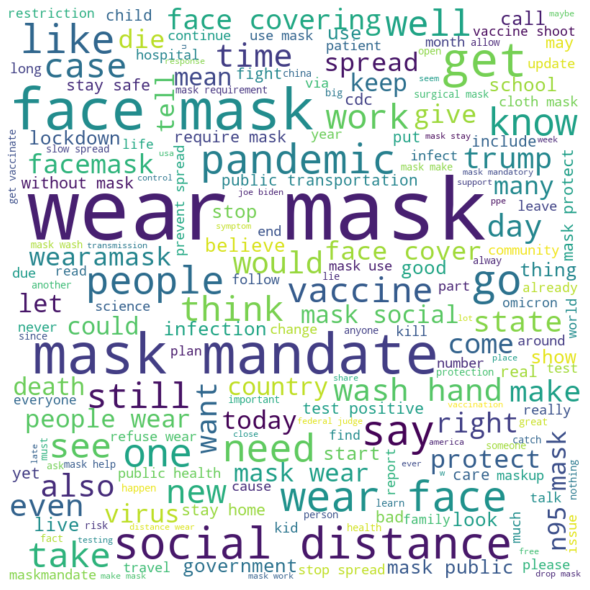

In [10]:
wordcloud_by_cluster('all')

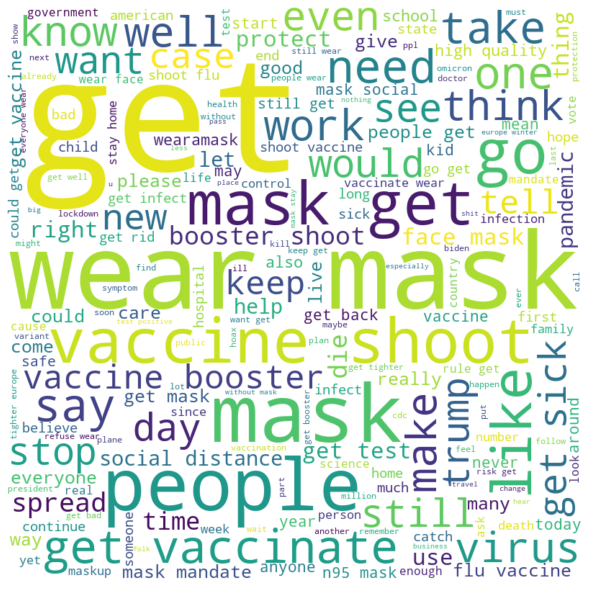

In [11]:
wordcloud_by_cluster(0)

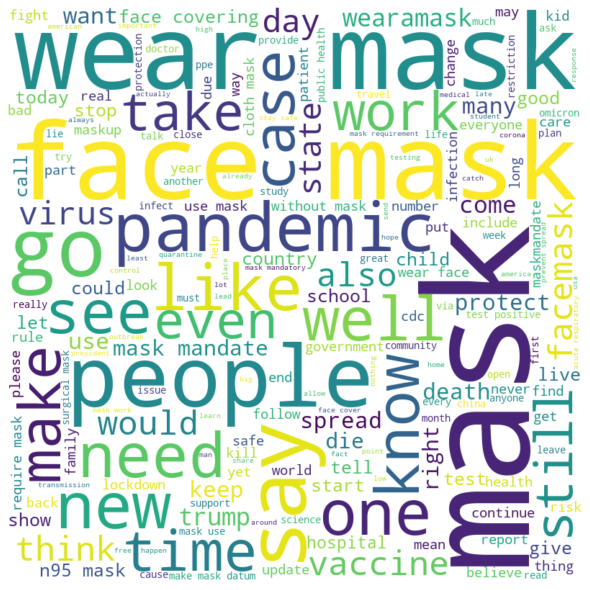

In [12]:
wordcloud_by_cluster(1)

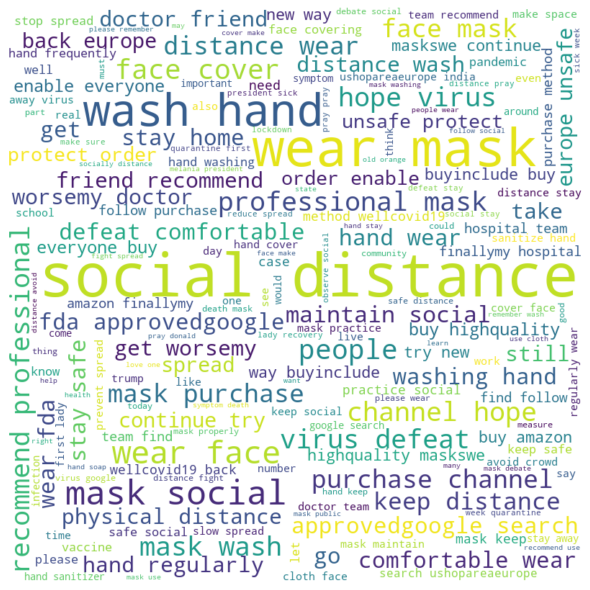

In [13]:
wordcloud_by_cluster(2)

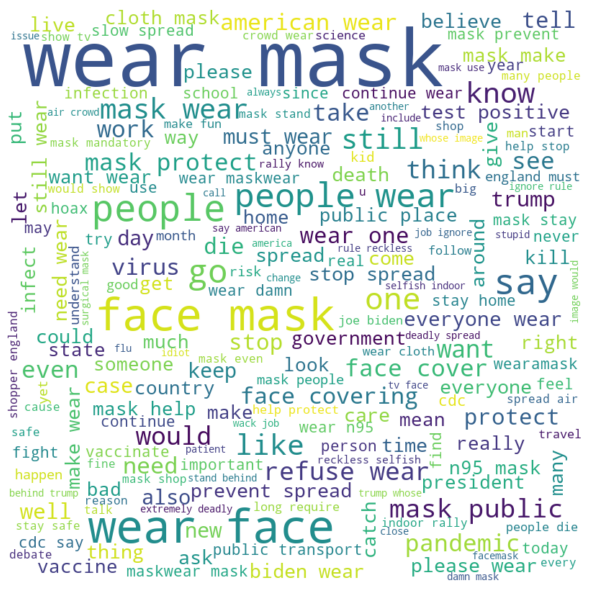

In [14]:
wordcloud_by_cluster(3)

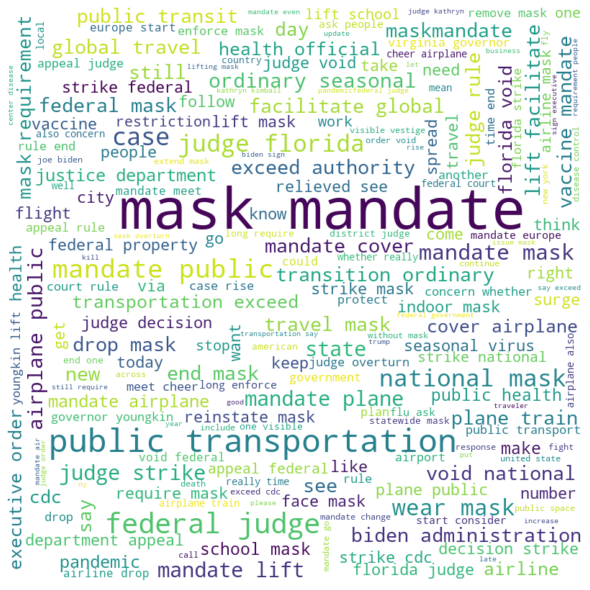

In [15]:
wordcloud_by_cluster(4)